In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask
from dask.distributed import Client

client = Client(n_workers=4)

/Users/bingpulsar/opt/miniconda3/lib/python3.9/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52228 instead
  warnings.warn(
distributed.diskutils - INFO - Found stale lock file and directory '/Users/bingpulsar/Work/image/dask-worker-space/worker-x51x0fh3', purging


In [2]:
df = pd.read_csv('sunspot_data.csv')[8035:]
df_i=df[df['Year'] > 1919]
Date=df_i['Date In Fraction Of Year']
Nums=df_i['Number of Sunspots']

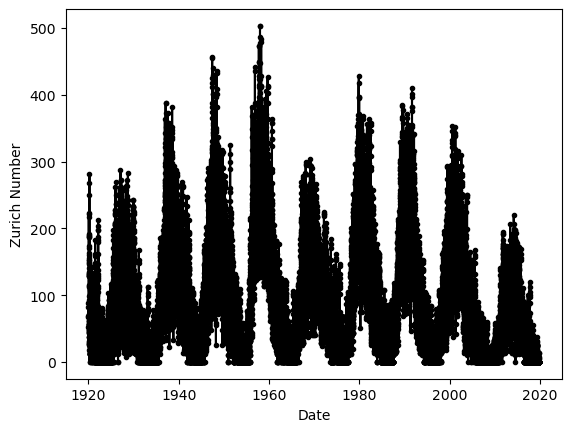

In [3]:
plt.plot(Date,Nums,'k.-')
plt.xlabel('Date')
plt.ylabel('Zurich Number')
plt.show()

In [4]:
%time
#正常处理
y=np.fft.fft(Nums)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 2.86 µs


In [5]:
%time
#使用delayed
y=dask.delayed(np.fft.fft)(Nums)
y=y.compute()

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 1.91 µs


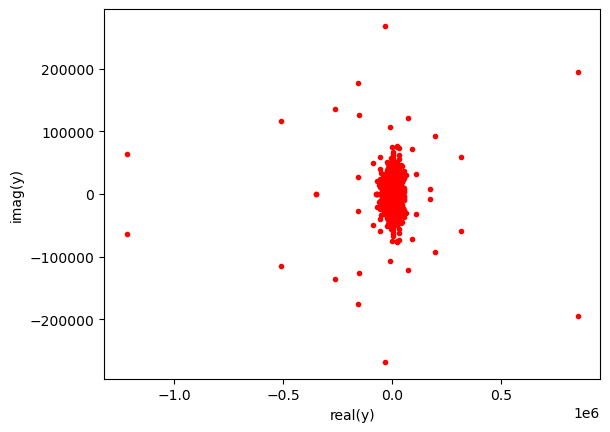

In [6]:
y[0]=0
plt.plot(y.real,y.imag,'r.')
plt.xlabel('real(y)')
plt.ylabel('imag(y)')
plt.show()

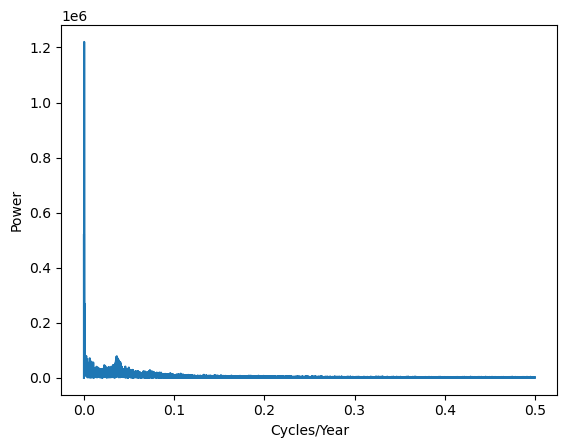

In [7]:
n=len(y)
power=abs(y[range(int(n/2))])
maxfreq=1/2
freq=np.arange(0,n/2)/(n/2)*maxfreq
plt.plot(freq,power)
plt.xlabel('Cycles/Year')
plt.ylabel('Power')
plt.show()

Sun 周期为： 11.100152207001523 年


/var/folders/5_/4_rlm6gd0bl9s9qqyttvtqgm0000gn/T/ipykernel_2939/2375772450.py:1: RuntimeWarning: divide by zero encountered in divide
  period=1/freq/365


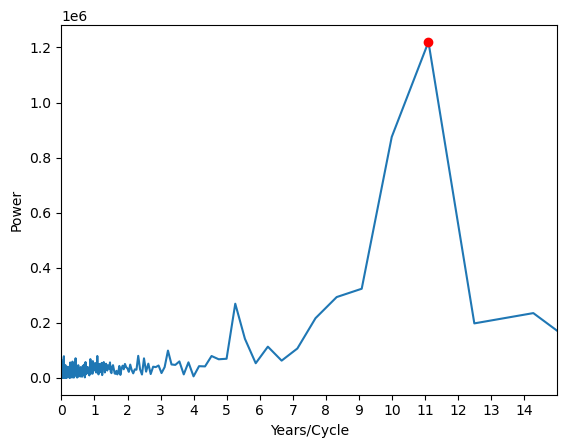

In [8]:
period=1/freq/365
plt.plot(period,power)
print('Sun 周期为：',period[np.argmax(power)],'年')
plt.plot(period[np.argmax(power)],np.amax(power),'ro')
plt.xticks(range(15))
plt.xlim([0,15])
plt.xlabel('Years/Cycle')
plt.ylabel('Power')
plt.show()